In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches
import alphatims.bruker

In [2]:
RAW_DATABASE_NAME = '/Users/darylwilding-mcbride/Downloads/HeLa_Evosep_diaPASEF_RAW/60SPD_py8/20200428_Evosep_60SPD_SG06-16_MLHeLa_200ng_py8_S3-A4_1_2450.d'

In [3]:
db_conn = sqlite3.connect('{}/analysis.tdf'.format(RAW_DATABASE_NAME))
df = pd.read_sql_query("select * from DiaFrameMsMsInfo order by Frame", db_conn)
db_conn.close()

In [4]:
df

,Frame,WindowGroup
0,2,1
1,3,2
2,4,3
3,5,4
4,6,5
...,...,...
10540,11859,5
10541,11860,6
10542,11861,7
10543,11862,8


In [5]:
df.WindowGroup.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [6]:
len(df.Frame.unique())

10545

In [7]:
db_conn = sqlite3.connect('{}/analysis.tdf'.format(RAW_DATABASE_NAME))
frame_df = pd.read_sql_query("select * from Frames order by Id", db_conn)
db_conn.close()

In [8]:
frame_df.MsMsType.unique()

array([0, 9])

In [9]:
frame_df[['Id','MsMsType']][10000:10050]

,Id,MsMsType
10000,10001,9
10001,10002,9
10002,10003,9
10003,10004,9
10004,10005,9
10005,10006,9
10006,10007,9
10007,10008,9
10008,10009,0
10009,10010,9


In [10]:
db_conn = sqlite3.connect('{}/analysis.tdf'.format(RAW_DATABASE_NAME))
windows_df = pd.read_sql_query("select * from DiaFrameMsMsWindows order by WindowGroup", db_conn)
db_conn.close()

In [11]:
windows_df

,WindowGroup,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,CollisionEnergy
0,1,0,537,812.5,25.0,43.493213
1,1,538,711,612.5,25.0,30.606335
2,1,712,918,412.5,25.0,23.692308
3,2,0,516,837.5,25.0,43.855204
4,2,517,690,637.5,25.0,31.366516
5,2,691,918,437.5,25.0,24.090498
6,3,0,494,862.5,25.0,44.253394
7,3,495,667,662.5,25.0,32.162896
8,3,668,918,462.5,25.0,24.488688
9,4,0,472,887.5,25.0,44.651584


In [12]:
db_conn = sqlite3.connect('{}/analysis.tdf'.format(RAW_DATABASE_NAME))
frame_window_df = pd.read_sql_query("select * from DiaFrameMsMsInfo order by Frame", db_conn)
db_conn.close()

In [13]:
frame_window_df[(frame_window_df.Frame >= 10009) & (frame_window_df.Frame <= 10017)]

,Frame,WindowGroup
8896,10010,1
8897,10011,2
8898,10012,3
8899,10013,4
8900,10014,5
8901,10015,6
8902,10016,7
8903,10017,8


In [ ]:
# create the TimsTOF object
RAW_HDF_FILE = '{}.hdf'.format(args.run_name)
RAW_HDF_PATH = '{}/{}'.format(RAW_DATABASE_BASE_DIR, RAW_HDF_FILE)
if not os.path.isfile(RAW_HDF_PATH):
    print('{} doesn\'t exist so loading the raw data from {}'.format(RAW_HDF_PATH, RAW_DATABASE_NAME))
    data = alphatims.bruker.TimsTOF(RAW_DATABASE_NAME)
    print('saving to {}'.format(RAW_HDF_PATH))
    _ = data.save_as_hdf(
        directory=RAW_DATABASE_BASE_DIR,
        file_name=RAW_HDF_FILE,
        overwrite=True
    )
else:
    print('loading raw data from {}'.format(RAW_HDF_PATH))
    data = alphatims.bruker.TimsTOF(RAW_HDF_PATH)

In [14]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

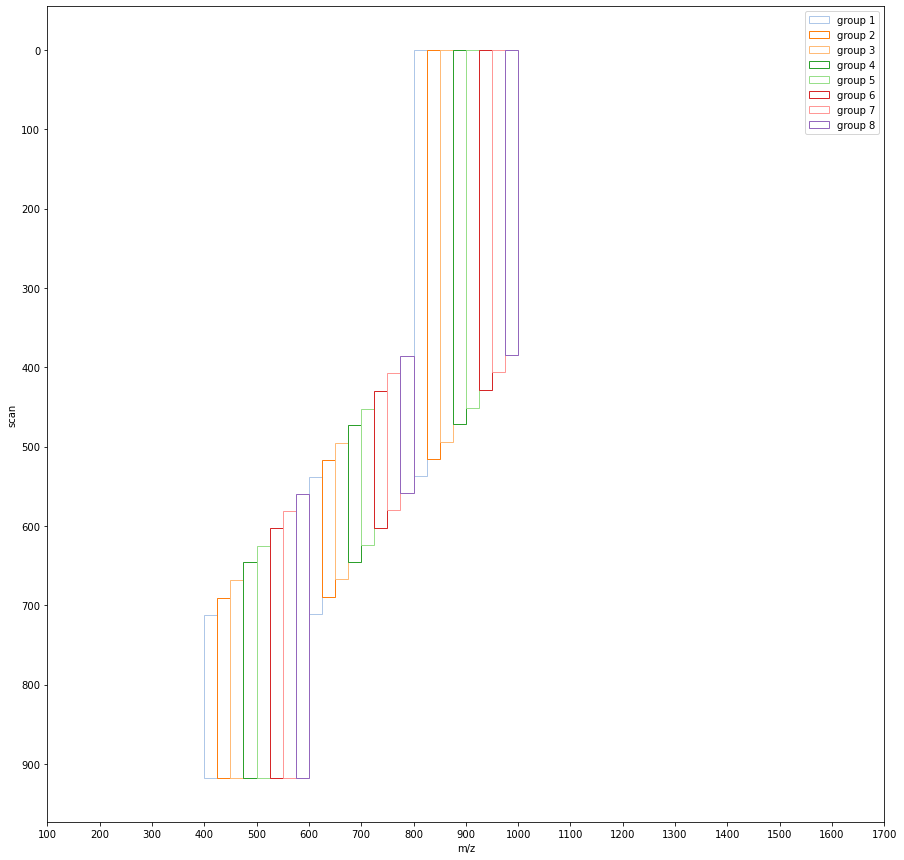

In [15]:
f, ax1 = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)

plt.margins(0.06)

# plot the raw data


# draw the isolation window groups
for group_name,group_df in windows_df.groupby('WindowGroup'):
    for idx,row in enumerate(group_df.itertuples()):
        mz_lower = row.IsolationMz - (row.IsolationWidth / 2)
        mz_upper = row.IsolationMz + (row.IsolationWidth / 2)
        scan_lower = row.ScanNumBegin
        scan_upper = row.ScanNumEnd
        top_left = (mz_lower,scan_lower)
        width = mz_upper - mz_lower
        height = scan_upper - scan_lower
        if idx == 0:
            isolation_rect = patches.Rectangle(top_left,width,height,linewidth=1.0,linestyle='-',edgecolor=tableau20_mpl[group_name],facecolor='none',label='group {}'.format(group_name))
        else:
            isolation_rect = patches.Rectangle(top_left,width,height,linewidth=1.0,linestyle='-',edgecolor=tableau20_mpl[group_name],facecolor='none')
        ax1.add_patch(isolation_rect)

plt.xlabel("m/z")
plt.ylabel("scan")

nearest = 100.
range_l = round(100. / nearest) * nearest
range_u = round(1700. / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

nearest = 100.0
range_l = round(0. / nearest) * nearest
range_u = round(920. / nearest) * nearest
plt.yticks(np.arange(range_l,range_u+nearest,nearest))

# plt.title('feature region around the voxel\'s midpoint, feature {}, RT {} secs'.format(selected_feature.feature_id, round(selected_feature.voxel_metadata_d['voxel_rt_midpoint'],1)))

plt.legend()
plt.gca().invert_yaxis()
plt.show()